In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import load_boston

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.sample(n = 10)

CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
462   6.65492   0.0  18.10   0.0  0.713  ...  24.0  666.0     20.2  396.90  13.99
260   0.54011  20.0   3.97   0.0  0.647  ...   5.0  264.0     13.0  392.80   9.59
290   0.03502  80.0   4.95   0.0  0.411  ...   4.0  245.0     19.2  396.90   3.33
69    0.12816  12.5   6.07   0.0  0.409  ...   4.0  345.0     18.9  396.90   8.79
403  24.80170   0.0  18.10   0.0  0.693  ...  24.0  666.0     20.2  396.90  19.77
372   8.26725   0.0  18.10   1.0  0.668  ...  24.0  666.0     20.2  347.88   8.88
358   5.20177   0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  395.43  11.48
268   0.54050  20.0   3.97   0.0  0.575  ...   5.0  264.0     13.0  390.30   3.16
363   4.22239   0.0  18.10   1.0  0.770  ...  24.0  666.0     20.2  353.04  14.64
292   0.03615  80.0   4.95   0.0  0.411  ...   4.0  245.0     19.2  396.90   4.70

[10 rows x 13 columns]

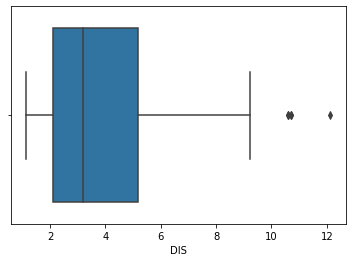

In [30]:
sns.boxplot(x=boston_df['DIS'])

In [31]:
from scipy import stats

z = np.abs(stats.zscore(boston_df["DIS"]))

# print yang Z-score nya > 3
print(np.where(np.abs(z) > 3))

(array([351, 352, 353, 354, 355]),)


In [19]:
# Check data outlier pada index ke 351 - 355
boston_df.iloc[340:356]

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
340  0.06151   0.0   5.19   0.0  0.515  ...  5.0  224.0     20.2  396.90   9.29
341  0.01301  35.0   1.52   0.0  0.442  ...  1.0  284.0     15.5  394.74   5.49
342  0.02498   0.0   1.89   0.0  0.518  ...  1.0  422.0     15.9  389.96   8.65
343  0.02543  55.0   3.78   0.0  0.484  ...  5.0  370.0     17.6  396.90   7.18
344  0.03049  55.0   3.78   0.0  0.484  ...  5.0  370.0     17.6  387.97   4.61
345  0.03113   0.0   4.39   0.0  0.442  ...  3.0  352.0     18.8  385.64  10.53
346  0.06162   0.0   4.39   0.0  0.442  ...  3.0  352.0     18.8  364.61  12.67
347  0.01870  85.0   4.15   0.0  0.429  ...  4.0  351.0     17.9  392.43   6.36
348  0.01501  80.0   2.01   0.0  0.435  ...  4.0  280.0     17.0  390.94   5.99
349  0.02899  40.0   1.25   0.0  0.429  ...  1.0  335.0     19.7  389.85   5.89
350  0.06211  40.0   1.25   0.0  0.429  ...  1.0  335.0     19.7  396.90   5.98
351  0.07950  60.0   1.69   0.0  0.411  ...  4.0  411.0     18.3  370.78   5.49
352  0.07244  60.0   1.69   0.0  0.411  ...  4.0  411.0     18.3  392.33   7.79
353  0.01709  90.0   2.02   0.0  0.410  ...  5.0  187.0     17.0  384.46   4.50
354  0.04301  80.0   1.91   0.0  0.413  ...  4.0  334.0     22.0  382.80   8.05
355  0.10659  80.0   1.91   0.0  0.413  ...  4.0  334.0     22.0  376.04   5.57

[16 rows x 13 columns]

In [33]:
# Kolom DIS outlier nya ada di index 351-355, dikenali dari |Z-score| nya > 3
print(z[351:356])

[3.28729991 3.28729991 3.96051769 3.22806892 3.22806892]


In [28]:
# Data yang outlier di-drop

print(boston_df.shape)
boston_df.drop(boston_df.index[[351, 352, 353, 354, 355]], inplace=True)
print(boston_df.shape)

(506, 13)
(501, 13)
